# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404101159.xlsx",sheet_name='201404101159')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,10,11:59:59,-67,0,-8,30.0,7.25,DOWN,False,...,0.06,1.29,-2.25,-3.88,-2.43,0.0000,机场73,机场68,0.0000,252960
1,4,10,12:00:00,-67,0,-8,30.0,7.50,DOWN,False,...,-0.33,-1.90,-4.60,-3.81,-4.59,-0.0625,机场73,机场68,-0.0625,252960
2,4,10,12:00:01,-67,0,-8,30.0,7.50,DOWN,False,...,-1.17,0.74,-2.96,-2.79,-2.89,0.0000,机场73,机场68,0.0000,252960
3,4,10,12:00:02,-67,0,-8,30.0,7.75,DOWN,False,...,1.31,-1.47,-3.82,-4.60,-3.83,0.0000,机场73,机场68,0.0000,252960
4,4,10,12:00:03,-67,0,-8,30.0,8.00,DOWN,False,...,1.05,2.70,-3.14,-4.59,-3.23,0.0000,机场73,机场68,0.0000,252960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,4,10,14:04:20,-107,0,-8,30.0,0.75,DOWN,False,...,1.38,1.03,2.67,2.34,2.76,-0.0625,机场73,机场68,-0.0625,237920
7459,4,10,14:04:21,-107,0,-8,30.0,0.75,DOWN,False,...,1.66,0.40,2.48,2.60,2.56,0.0000,机场73,机场68,0.0000,237920
7460,4,10,14:04:22,-108,8,-8,30.0,0.75,DOWN,False,...,1.82,1.03,2.22,2.70,2.29,-0.0625,机场73,机场68,-0.0625,237920
7461,4,10,14:04:23,-108,14,-8,30.0,0.75,DOWN,False,...,2.00,0.55,2.33,2.69,2.39,0.0000,机场73,机场68,0.0000,237920


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7463 entries, 0 to 7462
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              7463 non-null   int64  
 1   日              7463 non-null   int64  
 2   具体时间           7463 non-null   object 
 3   海拔高度           7463 non-null   int64  
 4   下降率            7463 non-null   int64  
 5   无线电高度          7463 non-null   int64  
 6   计算空速           7463 non-null   float64
 7   地速             7463 non-null   float64
 8   起落架            1236 non-null   object 
 9   空地电门0.2秒       7463 non-null   bool   
 10  空地电门0.4秒       7463 non-null   bool   
 11  空地电门0.6秒       7463 non-null   bool   
 12  空地电门0.8秒       7463 non-null   bool   
 13  空地电门1秒         7463 non-null   bool   
 14  着陆G值0.1秒       7463 non-null   float64
 15  着陆G值0.2秒       7463 non-null   float64
 16  着陆G值0.3秒       7463 non-null   float64
 17  着陆G值0.4秒       7463 non-null   float64
 18  着陆G值0.5秒

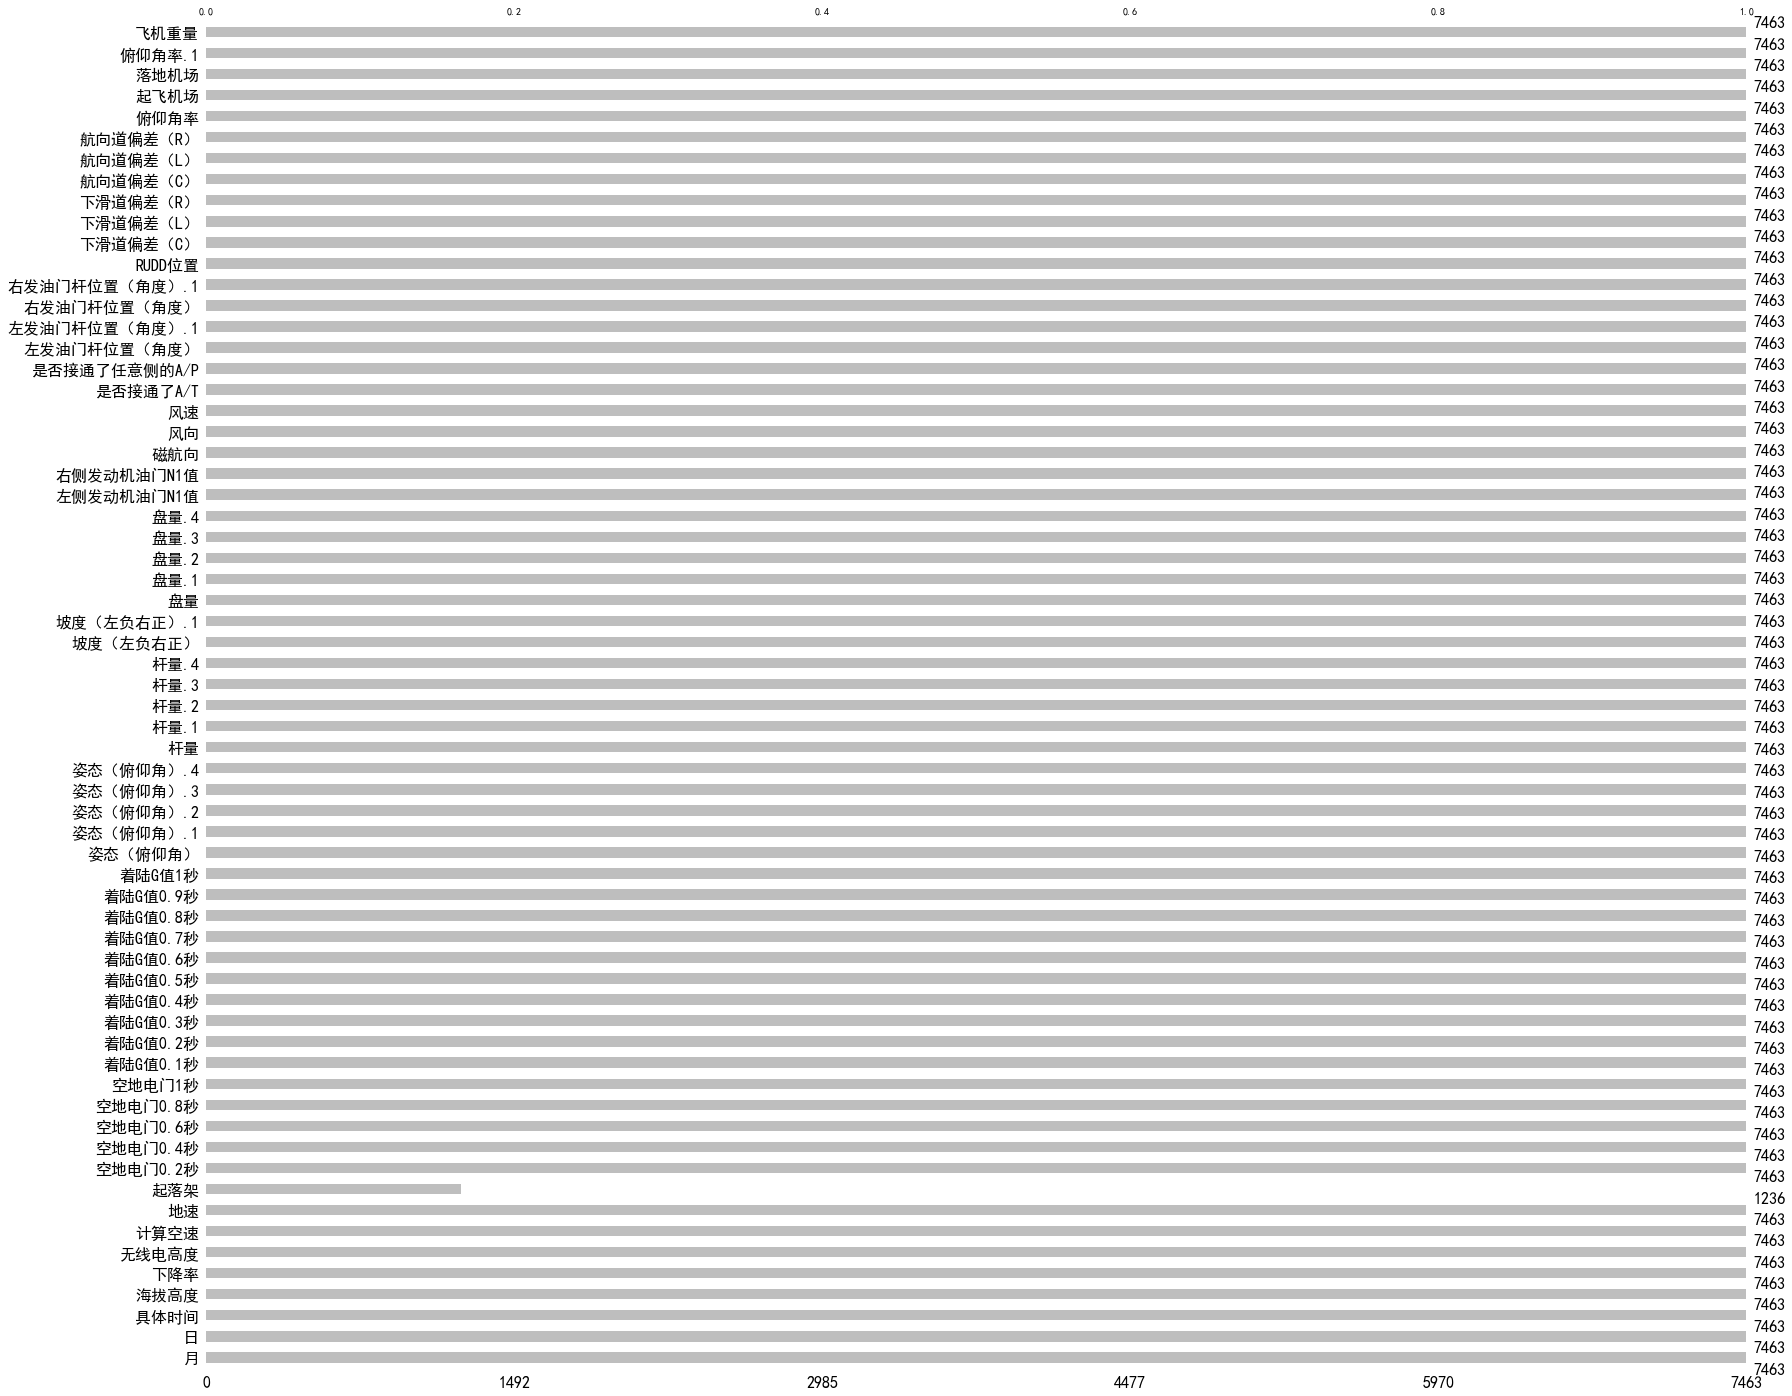

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()
plt.savefig('Figures\\附件1航班8缺失值.pdf')

In [5]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,10,11:59:59,-67,0,-8,30.0,7.25,DOWN,False,...,0.06,1.29,-2.25,-3.88,-2.43,0.0000,机场73,机场68,0.0000,252960
1,4,10,12:00:00,-67,0,-8,30.0,7.50,DOWN,False,...,-0.33,-1.90,-4.60,-3.81,-4.59,-0.0625,机场73,机场68,-0.0625,252960
2,4,10,12:00:01,-67,0,-8,30.0,7.50,DOWN,False,...,-1.17,0.74,-2.96,-2.79,-2.89,0.0000,机场73,机场68,0.0000,252960
3,4,10,12:00:02,-67,0,-8,30.0,7.75,DOWN,False,...,1.31,-1.47,-3.82,-4.60,-3.83,0.0000,机场73,机场68,0.0000,252960
4,4,10,12:00:03,-67,0,-8,30.0,8.00,DOWN,False,...,1.05,2.70,-3.14,-4.59,-3.23,0.0000,机场73,机场68,0.0000,252960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,4,10,14:04:20,-107,0,-8,30.0,0.75,DOWN,False,...,1.38,1.03,2.67,2.34,2.76,-0.0625,机场73,机场68,-0.0625,237920
7459,4,10,14:04:21,-107,0,-8,30.0,0.75,DOWN,False,...,1.66,0.40,2.48,2.60,2.56,0.0000,机场73,机场68,0.0000,237920
7460,4,10,14:04:22,-108,8,-8,30.0,0.75,DOWN,False,...,1.82,1.03,2.22,2.70,2.29,-0.0625,机场73,机场68,-0.0625,237920
7461,4,10,14:04:23,-108,14,-8,30.0,0.75,DOWN,False,...,2.00,0.55,2.33,2.69,2.39,0.0000,机场73,机场68,0.0000,237920


In [6]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,11:59:59,-67,0,-8,30.0,7.25,DOWN,False,False,False,...,34.1016,-0.1719,-1.35,0.06,1.29,-2.25,-3.88,-2.43,0.0000,0.0000
1,12:00:00,-67,0,-8,30.0,7.50,DOWN,False,False,False,...,34.0576,-0.1719,-0.80,-0.33,-1.90,-4.60,-3.81,-4.59,-0.0625,-0.0625
2,12:00:01,-67,0,-8,30.0,7.50,DOWN,False,False,False,...,34.1016,-0.1602,-1.37,-1.17,0.74,-2.96,-2.79,-2.89,0.0000,0.0000
3,12:00:02,-67,0,-8,30.0,7.75,DOWN,False,False,False,...,34.1016,-0.1602,1.60,1.31,-1.47,-3.82,-4.60,-3.83,0.0000,0.0000
4,12:00:03,-67,0,-8,30.0,8.00,DOWN,False,False,False,...,34.1016,-0.1836,1.22,1.05,2.70,-3.14,-4.59,-3.23,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,14:04:20,-107,0,-8,30.0,0.75,DOWN,False,False,False,...,34.0576,-0.2676,1.26,1.38,1.03,2.67,2.34,2.76,-0.0625,-0.0625
7459,14:04:21,-107,0,-8,30.0,0.75,DOWN,False,False,False,...,34.0576,-0.2676,1.29,1.66,0.40,2.48,2.60,2.56,0.0000,0.0000
7460,14:04:22,-108,8,-8,30.0,0.75,DOWN,False,False,False,...,34.0576,-0.2617,1.86,1.82,1.03,2.22,2.70,2.29,-0.0625,-0.0625
7461,14:04:23,-108,14,-8,30.0,0.75,DOWN,False,False,False,...,34.0576,-0.2617,1.45,2.00,0.55,2.33,2.69,2.39,0.0000,0.0000


# QAR异常判断，剔除

In [7]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
1096,True,12:18:16,12751,-3144,1404,310.625,372.25,0,True,True,...,69.5654,-0.2598,-0.25,0.03,0.11,-3.57,-3.57,-3.56,0.0,0.0
1097,True,12:18:16,12804,-3154,1404,310.750,372.50,0,True,True,...,69.5654,-0.2598,-0.26,-0.08,-0.12,-3.52,-3.53,-3.53,0.0,0.0
4303,True,13:11:44,30103,2,1404,305.625,465.25,0,True,True,...,55.0195,-0.2695,-0.51,0.00,-0.17,-0.20,0.07,-0.08,0.0,0.0
4304,True,13:11:44,30105,-10,1404,305.625,465.25,0,True,True,...,55.0195,-0.2676,-0.51,-0.36,-0.36,-0.14,-0.14,0.03,0.0,0.0


In [8]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,11:59:59,-67,0,-8,30.0,7.25,DOWN,False,False,...,34.1016,-0.1719,-1.35,0.06,1.29,-2.25,-3.88,-2.43,0.0000,0.0000
1,False,12:00:00,-67,0,-8,30.0,7.50,DOWN,False,False,...,34.0576,-0.1719,-0.80,-0.33,-1.90,-4.60,-3.81,-4.59,-0.0625,-0.0625
2,False,12:00:01,-67,0,-8,30.0,7.50,DOWN,False,False,...,34.1016,-0.1602,-1.37,-1.17,0.74,-2.96,-2.79,-2.89,0.0000,0.0000
3,False,12:00:02,-67,0,-8,30.0,7.75,DOWN,False,False,...,34.1016,-0.1602,1.60,1.31,-1.47,-3.82,-4.60,-3.83,0.0000,0.0000
4,False,12:00:03,-67,0,-8,30.0,8.00,DOWN,False,False,...,34.1016,-0.1836,1.22,1.05,2.70,-3.14,-4.59,-3.23,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,False,14:04:20,-107,0,-8,30.0,0.75,DOWN,False,False,...,34.0576,-0.2676,1.26,1.38,1.03,2.67,2.34,2.76,-0.0625,-0.0625
7459,False,14:04:21,-107,0,-8,30.0,0.75,DOWN,False,False,...,34.0576,-0.2676,1.29,1.66,0.40,2.48,2.60,2.56,0.0000,0.0000
7460,False,14:04:22,-108,8,-8,30.0,0.75,DOWN,False,False,...,34.0576,-0.2617,1.86,1.82,1.03,2.22,2.70,2.29,-0.0625,-0.0625
7461,False,14:04:23,-108,14,-8,30.0,0.75,DOWN,False,False,...,34.0576,-0.2617,1.45,2.00,0.55,2.33,2.69,2.39,0.0000,0.0000


In [9]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [10]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_7788\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,11:59:59,-67,0,-8,30.0,7.25,DOWN,False,...,-0.1719,-1.35,0.06,1.29,-2.25,-3.88,-2.43,0.0000,0.0000,1
1,False,False,12:00:00,-67,0,-8,30.0,7.50,DOWN,False,...,-0.1719,-0.80,-0.33,-1.90,-4.60,-3.81,-4.59,-0.0625,-0.0625,1
2,False,False,12:00:01,-67,0,-8,30.0,7.50,DOWN,False,...,-0.1602,-1.37,-1.17,0.74,-2.96,-2.79,-2.89,0.0000,0.0000,1
3,False,False,12:00:02,-67,0,-8,30.0,7.75,DOWN,False,...,-0.1602,1.60,1.31,-1.47,-3.82,-4.60,-3.83,0.0000,0.0000,1
4,False,False,12:00:03,-67,0,-8,30.0,8.00,DOWN,False,...,-0.1836,1.22,1.05,2.70,-3.14,-4.59,-3.23,0.0000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,False,False,14:04:20,-107,0,-8,30.0,0.75,DOWN,False,...,-0.2676,1.26,1.38,1.03,2.67,2.34,2.76,-0.0625,-0.0625,1
7459,False,False,14:04:21,-107,0,-8,30.0,0.75,DOWN,False,...,-0.2676,1.29,1.66,0.40,2.48,2.60,2.56,0.0000,0.0000,1
7460,False,False,14:04:22,-108,8,-8,30.0,0.75,DOWN,False,...,-0.2617,1.86,1.82,1.03,2.22,2.70,2.29,-0.0625,-0.0625,1
7461,False,False,14:04:23,-108,14,-8,30.0,0.75,DOWN,False,...,-0.2617,1.45,2.00,0.55,2.33,2.69,2.39,0.0000,0.0000,1


In [11]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [12]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,-67,0,-8,30.0,7.25,DOWN,False,False,False,False,...,34.1016,34.1016,-0.1719,-1.35,0.06,1.29,-2.25,-3.88,-2.43,0.0000
1,-67,0,-8,30.0,7.50,DOWN,False,False,False,False,...,34.1016,34.0576,-0.1719,-0.80,-0.33,-1.90,-4.60,-3.81,-4.59,-0.0625
2,-67,0,-8,30.0,7.50,DOWN,False,False,False,False,...,34.1016,34.1016,-0.1602,-1.37,-1.17,0.74,-2.96,-2.79,-2.89,0.0000
3,-67,0,-8,30.0,7.75,DOWN,False,False,False,False,...,34.1016,34.1016,-0.1602,1.60,1.31,-1.47,-3.82,-4.60,-3.83,0.0000
4,-67,0,-8,30.0,8.00,DOWN,False,False,False,False,...,34.1016,34.1016,-0.1836,1.22,1.05,2.70,-3.14,-4.59,-3.23,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,-107,0,-8,30.0,0.75,DOWN,False,False,False,False,...,34.0576,34.0576,-0.2676,1.26,1.38,1.03,2.67,2.34,2.76,-0.0625
7459,-107,0,-8,30.0,0.75,DOWN,False,False,False,False,...,34.0576,34.0576,-0.2676,1.29,1.66,0.40,2.48,2.60,2.56,0.0000
7460,-108,8,-8,30.0,0.75,DOWN,False,False,False,False,...,34.0576,34.0576,-0.2617,1.86,1.82,1.03,2.22,2.70,2.29,-0.0625
7461,-108,14,-8,30.0,0.75,DOWN,False,False,False,False,...,34.0576,34.0576,-0.2617,1.45,2.00,0.55,2.33,2.69,2.39,0.0000
